In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score 

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

import tensorflow as tf

from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,ExpSineSquared, DotProduct,ConstantKernel)
from sklearn.gaussian_process import GaussianProcessRegressor  
from sklearn.svm import SVR

import mitosheet

In [2]:
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Set notebook mode to work in offline
#pyo.init_notebook_mode()


#configure_plotly_browser_state()

pyo.init_notebook_mode(connected=True)

In [135]:
dea_types = ["IO_VRS", "OO_CRS", "OO_VRS", "IO_CRS"]
dea_list = ["US22", "S22","US55","S55"]

for t in dea_list:
    
    exec(f"{t} = pd.read_excel('Data/{t}.xlsx', index_col=0)")
    
    for i, d in enumerate(dea_types):
        
        exec(f"{t}_{d} = pd.read_excel('Data/{t}_Solution.xlsx', index_col=0, header=[1], nrows=1000, skiprows = i * 1000 + i * 2)")
        

In [136]:
dfs_data = [US22, S22, US55, S55]

dfs_es = [US22_IO_VRS, US22_OO_CRS, US22_OO_VRS, US22_IO_CRS,
      S22_IO_VRS, S22_OO_CRS, S22_OO_VRS, S22_IO_CRS,
      US55_IO_VRS, US55_OO_CRS, US55_OO_VRS, US55_IO_CRS,
      S55_IO_VRS, S55_OO_CRS, S55_OO_VRS, S55_IO_CRS]

### US22_IO_VRS 

In [5]:
X = dfs_data[0]
X.head()

,Input 1,Input 2,Output 1,Output 2
DMU 1,508.49,291.16,644.74,441.73
DMU 2,332.53,260.31,389.95,509.59
DMU 3,359.05,161.13,445.83,548.45
DMU 4,404.83,236.18,448.47,510.64
DMU 5,527.84,258.88,411.59,316.40


In [6]:
y = dfs_es[0]
y.head()

,Efficiency
DMU,
DMU 1,0.970309
DMU 2,0.594647
DMU 3,0.680770
DMU 4,0.657605
DMU 5,0.533526


In [7]:
scaler = StandardScaler()
reg_model = LinearRegression()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.0021843705820876955
neg_root_mean_squared_error: -0.04655665261040305
r2: 0.8239040795513091


In [8]:
reg_model = DecisionTreeRegressor(random_state=42)

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.002921023926530225
neg_root_mean_squared_error: -0.053721844343419554
r2: 0.7645248013805576


In [9]:
reg_model = KNeighborsRegressor()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.0017028891337208956
neg_root_mean_squared_error: -0.0409798743500517
r2: 0.8628178780990401


In [10]:
reg_model = RandomForestRegressor(random_state=42)

pipe = make_pipeline(scaler, reg_model)


# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.0014872956578542284
neg_root_mean_squared_error: -0.03827799700669887
r2: 0.8800750593111779


In [11]:
reg_model = GradientBoostingRegressor(random_state=42)

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.0009388576999912566
neg_root_mean_squared_error: -0.0304797729643021
r2: 0.9243043154651709


In [12]:
# Determination of the kernel used and the value lenght_scale at which the optimization process starts
kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3))

# Application of the regressor (alpha makes a statement about a possible noise of the training data)
reg_model = GaussianProcessRegressor(kernel=kernel, alpha=0.1)

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.002103870402304228
neg_root_mean_squared_error: -0.0456494418881935
r2: 0.8305496905550166


In [13]:
# Choose regression method and set hyperparameter
reg_model=SVR()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.005165415940496269
neg_root_mean_squared_error: -0.0718237168887064
r2: 0.5811057043923935


In [14]:
poly = PolynomialFeatures(degree=2)

# Choose regression method and set hyperparameter
reg_model=GradientBoostingRegressor(random_state=42)

pipe = make_pipeline(scaler, poly, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.0009373438910972622
neg_root_mean_squared_error: -0.030359359324744244
r2: 0.9246315897856622


In [15]:
poly = PolynomialFeatures(degree=3)

# Choose regression method and set hyperparameter
reg_model=LinearRegression()

pipe = make_pipeline(scaler, poly, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.00017452297500772693
neg_root_mean_squared_error: -0.013095883125501384
r2: 0.9859091985205776


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)

res = pd.DataFrame()
res["Prediction"] = pd.Series(prediction.ravel())
res["Actual"] = y_test.values
res["Diff"] = res.Prediction - res.Actual
res["Error_Perc"] = ((res.Prediction - res.Actual) / res.Actual) * 100 
res["Error_Perc < 3"] = np.abs(res["Error_Perc"]) < 3  
res = res.round(4)
res

,Prediction,Actual,Diff,Error_Perc,Error_Perc < 3
0,0.7171,0.7384,-0.0213,-2.8869,True
1,0.7412,0.7338,0.0075,1.0203,True
2,0.7260,0.7223,0.0037,0.5086,True
3,0.5324,0.5325,-0.0001,-0.0106,True
4,0.5134,0.5162,-0.0028,-0.5339,True
...,...,...,...,...,...
195,0.7130,0.7193,-0.0063,-0.8694,True
196,0.6582,0.6557,0.0025,0.3766,True
197,0.5877,0.5859,0.0019,0.3169,True
198,0.7836,0.8051,-0.0214,-2.6630,True


In [17]:
blue = res["Error_Perc < 3"].sum()
print(blue)
red = len(res["Error_Perc < 3"]) - (res["Error_Perc < 3"].sum())
red

184


16

In [18]:
print(res.describe())

       Prediction      Actual        Diff  Error_Perc
count  200.000000  200.000000  200.000000  200.000000
mean     0.677801    0.680476   -0.002679   -0.247214
std      0.113849    0.120285    0.016104    1.978668
min      0.468000    0.455700   -0.139700  -14.481000
25%      0.585150    0.586800   -0.007150   -1.132575
50%      0.661900    0.660800   -0.001600   -0.265250
75%      0.733400    0.738400    0.004375    0.713775
max      0.996400    1.000000    0.032100    4.353900


In [19]:
rho, p = stats.spearmanr(res.Prediction, res.Actual)
print("rho:", rho.round(4)) 
print("p-Value", p.round(4)) 

rho: 0.994
p-Value 0.0


In [ ]:
res.to_excel("Data/US22_ML.xlsx", index=False)

In [ ]:
fig = px.scatter(res, x="Actual", y="Prediction", color = "Error_Perc < 3", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Actual", "Prediction", "Error_Perc"])

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Prediction - Actual Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

In [ ]:
np.random.seed(1)
tf.random.set_seed(2)

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))

ann.add(tf.keras.layers.Dense(units=1))
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')
ann.fit(X_train, y_train, batch_size = 32, epochs = 1000, verbose=1)

In [23]:
print("mean_squared_error:", mean_squared_error(y_test, ann.predict(X_test)))
print("neg_mean_squared_error:", mean_squared_error(y_test, ann.predict(X_test), squared=False))
print("r2:", r2_score(y_test, ann.predict(X_test)))

mean_squared_error: 0.0004780194391755936
neg_mean_squared_error: 0.021863655668153795
r2: 0.9667945796700489


In [24]:
prediction = ann.predict(X_test)

res_ann = pd.DataFrame()
res_ann["Prediction"] = pd.Series(prediction.ravel())
res_ann["Actual"] = y_test.values
res_ann["Diff"] = res_ann.Prediction - res_ann.Actual
res_ann["Error_Perc"] = ((res_ann.Prediction - res_ann.Actual) / res_ann.Actual) * 100 
res_ann["Error_Perc < 3"] = np.abs(res_ann["Error_Perc"]) < 3 
res_ann = res_ann.round(4)

res_ann

,Prediction,Actual,Diff,Error_Perc,Error_Perc < 3
0,0.7161,0.7384,-0.0223,-3.0224,False
1,0.7325,0.7338,-0.0013,-0.1727,True
2,0.7170,0.7223,-0.0053,-0.7319,True
3,0.5283,0.5325,-0.0042,-0.7858,True
4,0.5177,0.5162,0.0016,0.3017,True
...,...,...,...,...,...
195,0.7112,0.7193,-0.0081,-1.1284,True
196,0.6524,0.6557,-0.0034,-0.5112,True
197,0.5861,0.5859,0.0002,0.0330,True
198,0.7701,0.8051,-0.0350,-4.3422,False


In [25]:
blue = res_ann["Error_Perc < 3"].sum()
print(blue)
red = len(res_ann["Error_Perc < 3"]) - (res_ann["Error_Perc < 3"].sum())
red

168


32

In [26]:
res_ann.describe()

,Prediction,Actual,Diff,Error_Perc
count,200.000000,200.000000,200.000000,200.000000
mean,0.670408,0.680476,-0.010074,-1.224645
std,0.108008,0.120285,0.019453,2.253669
min,0.439400,0.455700,-0.122400,-12.693400
25%,0.586775,0.586800,-0.013250,-1.954950
50%,0.657600,0.660800,-0.004250,-0.668100
75%,0.725800,0.738400,-0.000400,-0.056425
max,0.979900,1.000000,0.026200,5.444800


In [27]:
rho, p = stats.spearmanr(res_ann.Prediction, res_ann.Actual)
print("rho:", rho.round(4)) 
print("p-Value", p.round(4)) 

rho: 0.9961
p-Value 0.0


In [28]:
res_ann.to_excel("Data/US22_DL.xlsx", index=False)

In [29]:
fig = px.scatter(res_ann, x="Actual", y="Prediction", color = "Error_Perc < 3", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Actual", "Prediction", "Error_Perc"])

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Prediction - Actual Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

### S22_IO_VRS 

In [30]:
X = dfs_data[1]
X.head()

,Input 1,Input 2,Output 1,Output 2
DMU 1,110.03,366.95,98.95,697.08
DMU 2,128.76,153.40,101.17,590.34
DMU 3,126.43,412.75,91.89,513.49
DMU 4,123.73,395.73,98.75,423.26
DMU 5,114.73,333.32,110.78,444.36


In [31]:
y = dfs_es[4]
y.head()

,Efficiency
DMU,
DMU 1,0.862831
DMU 2,0.770272
DMU 3,0.734742
DMU 4,0.748861
DMU 5,0.825456


In [32]:
scaler = StandardScaler()
reg_model = LinearRegression()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.0002721718678702178
neg_root_mean_squared_error: -0.01634712182454984
r2: 0.9292707491713635


In [33]:
reg_model = DecisionTreeRegressor(random_state=42)

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.0002142469874643844
neg_root_mean_squared_error: -0.014311696481520836
r2: 0.9454184859548672


In [34]:
reg_model = KNeighborsRegressor()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.0002880307892109068
neg_root_mean_squared_error: -0.016882906151602643
r2: 0.9258275180974873


In [35]:
reg_model = RandomForestRegressor(random_state=42)

pipe = make_pipeline(scaler, reg_model)


# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.00013828672031257358
neg_root_mean_squared_error: -0.011568210080769206
r2: 0.9646008448815


In [36]:
reg_model = GradientBoostingRegressor(random_state=42)

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -7.448184276000015e-05
neg_root_mean_squared_error: -0.008509284609687483
r2: 0.9809680427883218


In [37]:
# Determination of the kernel used and the value lenght_scale at which the optimization process starts
kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3))

# Application of the regressor (alpha makes a statement about a possible noise of the training data)
reg_model = GaussianProcessRegressor(kernel=kernel, alpha=0.1, random_state=42)

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.0003757007828764883
neg_root_mean_squared_error: -0.0192607874176957
r2: 0.90291348480355


In [38]:
# Choose regression method and set hyperparameter
reg_model=SVR()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.00299974827118884
neg_root_mean_squared_error: -0.054750132911229835
r2: 0.2244063302426679


In [39]:
poly = PolynomialFeatures(degree=2)

# Choose regression method and set hyperparameter
reg_model=GradientBoostingRegressor(random_state=42)

pipe = make_pipeline(scaler, poly, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -7.971745585145975e-05
neg_root_mean_squared_error: -0.008854122812167691
r2: 0.979516064433011


In [40]:
poly = PolynomialFeatures(degree=3)

# Choose regression method and set hyperparameter
reg_model=LinearRegression()

pipe = make_pipeline(scaler, poly, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -5.535608897114981e-05
neg_root_mean_squared_error: -0.007280101506419855
r2: 0.9856335871191924


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)

res = pd.DataFrame()
res["Prediction"] = pd.Series(prediction.ravel())
res["Actual"] = y_test.values
res["Diff"] = res.Prediction - res.Actual
res["Error_Perc"] = ((res.Prediction - res.Actual) / res.Actual) * 100 
res["Error_Perc < 3"] = np.abs(res["Error_Perc"]) < 3  
res = res.round(4)
res

,Prediction,Actual,Diff,Error_Perc,Error_Perc < 3
0,0.8384,0.8425,-0.0042,-0.4951,True
1,0.8219,0.8252,-0.0032,-0.3936,True
2,0.8153,0.8175,-0.0022,-0.2731,True
3,0.8179,0.8208,-0.0029,-0.3557,True
4,0.8383,0.8384,-0.0001,-0.0119,True
...,...,...,...,...,...
195,0.8681,0.8417,0.0264,3.1405,False
196,0.7956,0.7992,-0.0037,-0.4608,True
197,0.8226,0.8275,-0.0049,-0.5881,True
198,0.8357,0.8326,0.0031,0.3748,True


In [42]:
blue = res["Error_Perc < 3"].sum()
print(blue)
red = len(res["Error_Perc < 3"]) - (res["Error_Perc < 3"].sum())
red

196


4

In [43]:
print(res.describe())

       Prediction      Actual        Diff  Error_Perc
count  200.000000  200.000000  200.000000  200.000000
mean     0.828168    0.828397   -0.000235   -0.019973
std      0.059915    0.060685    0.006369    0.734276
min      0.692500    0.690000   -0.050200   -5.020500
25%      0.789350    0.787100   -0.002900   -0.352400
50%      0.819700    0.821800   -0.000500   -0.059750
75%      0.863775    0.861700    0.002625    0.320875
max      0.999500    1.000000    0.026400    3.140500


In [44]:
rho, p = stats.spearmanr(res.Prediction, res.Actual)
print("rho:", rho.round(4)) 
print("p-Value", p.round(4)) 

rho: 0.9947
p-Value 0.0


In [45]:
res.to_excel("Data/S22_ML.xlsx", index=False)

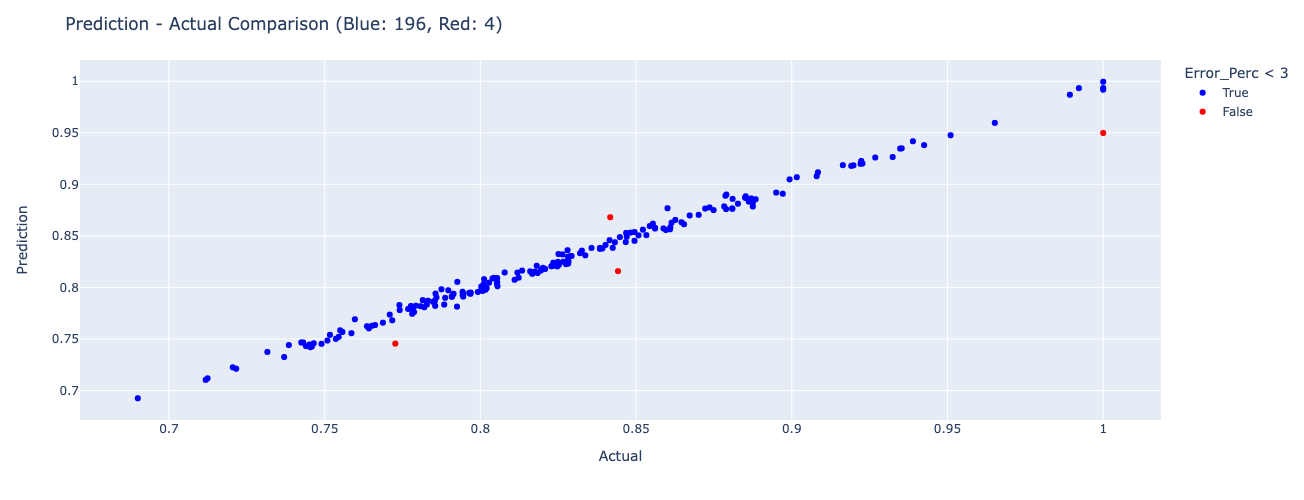

In [46]:
fig = px.scatter(res, x="Actual", y="Prediction", color = "Error_Perc < 3", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Actual", "Prediction", "Error_Perc"])

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Prediction - Actual Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

In [ ]:
np.random.seed(1)
tf.random.set_seed(2)

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))

ann.add(tf.keras.layers.Dense(units=1))
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')
ann.fit(X_train, y_train, batch_size = 32, epochs = 1000, verbose=1)

In [48]:
print("mean_squared_error:", mean_squared_error(y_test, ann.predict(X_test)))
print("neg_mean_squared_error:", mean_squared_error(y_test, ann.predict(X_test), squared=False))
print("r2:", r2_score(y_test, ann.predict(X_test)))

mean_squared_error: 0.0002931018525689805
neg_mean_squared_error: 0.017120217655420756
r2: 0.9200068407488082


In [49]:
prediction = ann.predict(X_test)

res_ann = pd.DataFrame()
res_ann["Prediction"] = pd.Series(prediction.ravel())
res_ann["Actual"] = y_test.values
res_ann["Diff"] = res_ann.Prediction - res_ann.Actual
res_ann["Error_Perc"] = ((res_ann.Prediction - res_ann.Actual) / res_ann.Actual) * 100 
res_ann["Error_Perc < 3"] = np.abs(res_ann["Error_Perc"]) < 3 
res_ann = res_ann.round(4)

res_ann

,Prediction,Actual,Diff,Error_Perc,Error_Perc < 3
0,0.8614,0.8425,0.0188,2.2366,True
1,0.8307,0.8252,0.0055,0.6708,True
2,0.8340,0.8175,0.0164,2.0120,True
3,0.8366,0.8208,0.0159,1.9316,True
4,0.8644,0.8384,0.0260,3.0965,False
...,...,...,...,...,...
195,0.8548,0.8417,0.0132,1.5640,True
196,0.8161,0.7992,0.0169,2.1133,True
197,0.8412,0.8275,0.0137,1.6565,True
198,0.8426,0.8326,0.0100,1.1996,True


In [50]:
blue = res_ann["Error_Perc < 3"].sum()
print(blue)
red = len(res_ann["Error_Perc < 3"]) - (res_ann["Error_Perc < 3"].sum())
red

185


15

In [51]:
res_ann.describe()

,Prediction,Actual,Diff,Error_Perc
count,200.000000,200.000000,200.000000,200.000000
mean,0.843316,0.828397,0.014919,1.807164
std,0.061422,0.060685,0.008418,0.967576
min,0.710900,0.690000,-0.015000,-1.779100
25%,0.799700,0.787100,0.011275,1.322200
50%,0.835200,0.821800,0.014600,1.809100
75%,0.879825,0.861700,0.018425,2.285950
max,1.004000,1.000000,0.056200,6.343100


In [52]:
rho, p = stats.spearmanr(res_ann.Prediction, res_ann.Actual)
print("rho:", rho.round(4)) 
print("p-Value", p.round(4)) 

rho: 0.9922
p-Value 0.0


In [53]:
res_ann.to_excel("Data/S22_DL.xlsx", index=False)

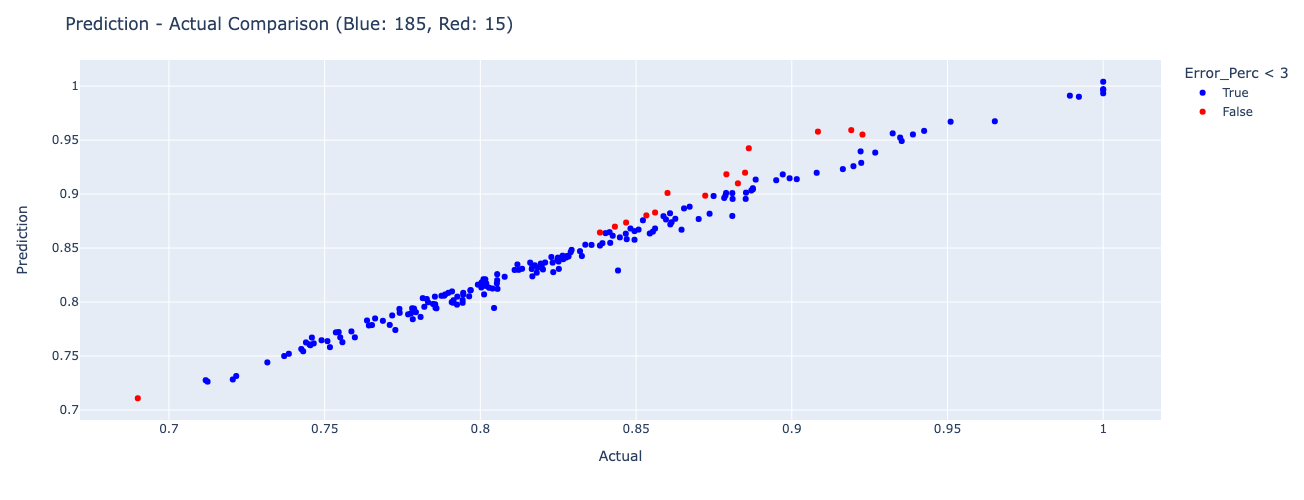

In [54]:
fig = px.scatter(res_ann, x="Actual", y="Prediction", color = "Error_Perc < 3", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Actual", "Prediction", "Error_Perc"])

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Prediction - Actual Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

### US55_IO_VRS 

In [137]:
X = dfs_data[2]
X.head()

,Input 1,Input 2,Input 3,Input 4,Input 5,Output 1,Output 2,Output 3,Output 4,Output 5
DMU 1,262.93,368.02,311.81,369.14,158.95,373.54,165.68,625.17,620.95,193.29
DMU 2,267.81,449.71,300.84,194.85,195.14,312.06,154.78,360.41,510.36,291.05
DMU 3,315.52,467.64,249.35,285.36,251.24,224.69,214.17,333.71,378.87,180.60
DMU 4,273.62,219.07,245.76,379.23,164.55,345.12,200.72,466.64,560.33,172.56
DMU 5,323.65,298.21,369.23,380.81,117.59,406.04,218.08,513.41,583.01,152.26


In [139]:
y = dfs_es[8]
y.head()

,Efficiency
DMU,
DMU 1,0.907674
DMU 2,0.873908
DMU 3,0.739374
DMU 4,0.966396
DMU 5,0.984420


In [140]:
scaler = StandardScaler()
reg_model = LinearRegression()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.002436713177744296
neg_root_mean_squared_error: -0.049315247895884255
r2: 0.606325923154546


In [141]:
reg_model = DecisionTreeRegressor(random_state=42)

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.005177004277546065
neg_root_mean_squared_error: -0.07189173410028489
r2: 0.16177403814671815


In [142]:
reg_model = KNeighborsRegressor()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.002944484977517348
neg_root_mean_squared_error: -0.05421718343108302
r2: 0.5244282238246727


In [143]:
reg_model = RandomForestRegressor(random_state=42)

pipe = make_pipeline(scaler, reg_model)


# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.002192211087659659
neg_root_mean_squared_error: -0.04673845490639632
r2: 0.6474410773910225


In [144]:
reg_model = GradientBoostingRegressor(random_state=42)

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.001608437850714225
neg_root_mean_squared_error: -0.040050003903887785
r2: 0.7411261997597693


In [145]:
# Determination of the kernel used and the value lenght_scale at which the optimization process starts
kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3))

# Application of the regressor (alpha makes a statement about a possible noise of the training data)
reg_model = GaussianProcessRegressor(kernel=kernel, alpha=0.1, random_state=42)

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.0034624085692240266
neg_root_mean_squared_error: -0.05878355566144139
r2: 0.44259809788438675


In [146]:
# Choose regression method and set hyperparameter
reg_model=SVR()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.004043931168079254
neg_root_mean_squared_error: -0.06350995298513483
r2: 0.34932712280426187


In [147]:
poly = PolynomialFeatures(degree=2)

# Choose regression method and set hyperparameter
reg_model=GradientBoostingRegressor(random_state=42)

pipe = make_pipeline(scaler, poly, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.0016350953061213605
neg_root_mean_squared_error: -0.04037820951617238
r2: 0.7369554788116259


In [148]:
poly = PolynomialFeatures(degree=3)

# Choose regression method and set hyperparameter
reg_model=LinearRegression()

pipe = make_pipeline(scaler, poly, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.0009530136197947418
neg_root_mean_squared_error: -0.030832886103533286
r2: 0.8465176657124862


In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)

res = pd.DataFrame()
res["Prediction"] = pd.Series(prediction.ravel())
res["Actual"] = y_test.values
res["Diff"] = res.Prediction - res.Actual
res["Error_Perc"] = ((res.Prediction - res.Actual) / res.Actual) * 100 
res["Error_Perc < 3"] = np.abs(res["Error_Perc"]) < 3  
res = res.round(4)
res

,Prediction,Actual,Diff,Error_Perc,Error_Perc < 3
0,0.8264,0.8217,0.0047,0.5763,True
1,0.9161,0.9858,-0.0697,-7.0739,False
2,0.9314,0.9323,-0.0008,-0.0882,True
3,0.8843,0.8743,0.0099,1.1353,True
4,0.7906,0.8009,-0.0102,-1.2756,True
...,...,...,...,...,...
195,0.8585,0.8159,0.0426,5.2198,False
196,1.0705,1.0000,0.0705,7.0451,False
197,0.8612,0.8486,0.0125,1.4766,True
198,0.8712,0.8669,0.0043,0.4930,True


In [150]:
blue = res["Error_Perc < 3"].sum()
print(blue)
red = len(res["Error_Perc < 3"]) - (res["Error_Perc < 3"].sum())
red

163


37

In [151]:
print(res.describe())

       Prediction      Actual        Diff  Error_Perc
count  200.000000  200.000000  200.000000  200.000000
mean     0.900001    0.900382   -0.000384   -0.022008
std      0.079339    0.077497    0.025406    2.691340
min      0.716200    0.726400   -0.097300   -9.732300
25%      0.838950    0.835975   -0.013525   -1.586050
50%      0.895900    0.898850    0.000750    0.081850
75%      0.953800    0.986000    0.013675    1.490300
max      1.095100    1.000000    0.095100    9.506100


In [152]:
rho, p = stats.spearmanr(res.Prediction, res.Actual)
print("rho:", rho.round(4)) 
print("p-Value", p.round(4)) 

rho: 0.9645
p-Value 0.0


In [153]:
res.to_excel("Data/US55_ML.xlsx", index=False)

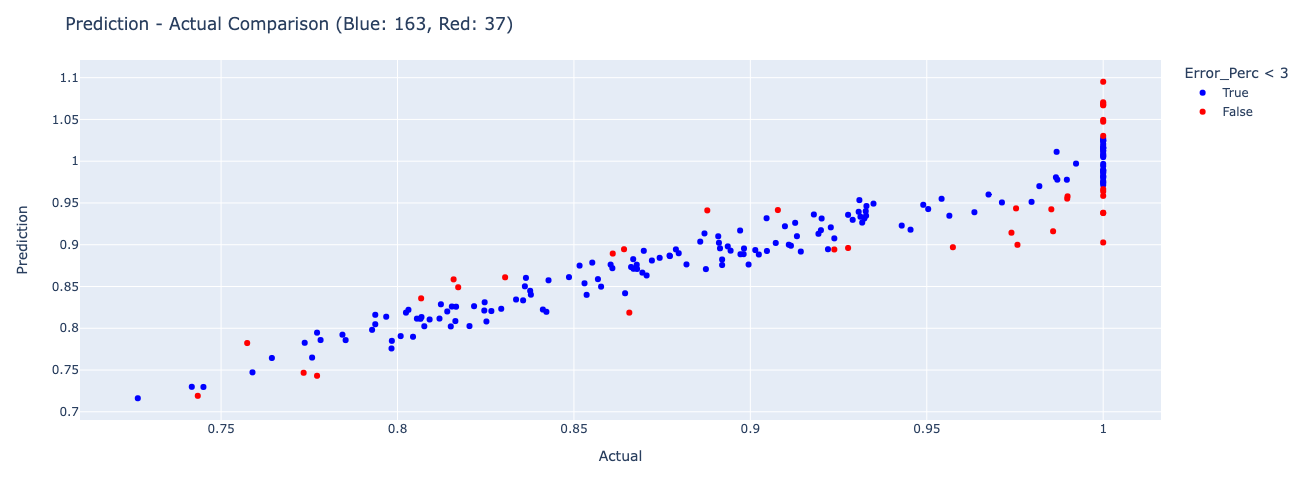

In [154]:
fig = px.scatter(res, x="Actual", y="Prediction", color = "Error_Perc < 3", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Actual", "Prediction", "Error_Perc"])

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Prediction - Actual Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

In [ ]:
np.random.seed(1)
tf.random.set_seed(2)

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))

ann.add(tf.keras.layers.Dense(units=1))
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')
ann.fit(X_train, y_train, batch_size = 32, epochs = 1000, verbose=1)

In [156]:
print("mean_squared_error:", mean_squared_error(y_test, ann.predict(X_test)))
print("neg_mean_squared_error:", mean_squared_error(y_test, ann.predict(X_test), squared=False))
print("r2:", r2_score(y_test, ann.predict(X_test)))

mean_squared_error: 0.000755557494335618
neg_mean_squared_error: 0.027487406104171015
r2: 0.873559324067956


In [157]:
prediction = ann.predict(X_test)

res_ann = pd.DataFrame()
res_ann["Prediction"] = pd.Series(prediction.ravel())
res_ann["Actual"] = y_test.values
res_ann["Diff"] = res_ann.Prediction - res_ann.Actual
res_ann["Error_Perc"] = ((res_ann.Prediction - res_ann.Actual) / res_ann.Actual) * 100 
res_ann["Error_Perc < 3"] = np.abs(res_ann["Error_Perc"]) < 3 
res_ann = res_ann.round(4)

res_ann

,Prediction,Actual,Diff,Error_Perc,Error_Perc < 3
0,0.8304,0.8217,0.0088,1.0672,True
1,0.9949,0.9858,0.0090,0.9157,True
2,0.9706,0.9323,0.0383,4.1075,False
3,0.8576,0.8743,-0.0167,-1.9107,True
4,0.8383,0.8009,0.0375,4.6810,False
...,...,...,...,...,...
195,0.9036,0.8159,0.0877,10.7520,False
196,0.9966,1.0000,-0.0034,-0.3439,True
197,0.8407,0.8486,-0.0080,-0.9396,True
198,0.8475,0.8669,-0.0194,-2.2335,True


In [158]:
blue = res_ann["Error_Perc < 3"].sum()
print(blue)
red = len(res_ann["Error_Perc < 3"]) - (res_ann["Error_Perc < 3"].sum())
red

150


50

In [159]:
res_ann.describe()

,Prediction,Actual,Diff,Error_Perc
count,200.000000,200.000000,200.000000,200.000000
mean,0.899147,0.900382,-0.001235,-0.062877
std,0.074604,0.077497,0.027524,3.177634
min,0.727600,0.726400,-0.091700,-10.138000
25%,0.837400,0.835975,-0.015150,-1.680875
50%,0.900600,0.898850,-0.003400,-0.340100
75%,0.968225,0.986000,0.009150,1.047475
max,0.997400,1.000000,0.136000,17.579600


In [160]:
rho, p = stats.spearmanr(res_ann.Prediction, res_ann.Actual)
print("rho:", rho.round(4)) 
print("p-Value", p.round(4)) 

rho: 0.9298
p-Value 0.0


In [161]:
res_ann.to_excel("Data/US55_DL.xlsx", index=False)

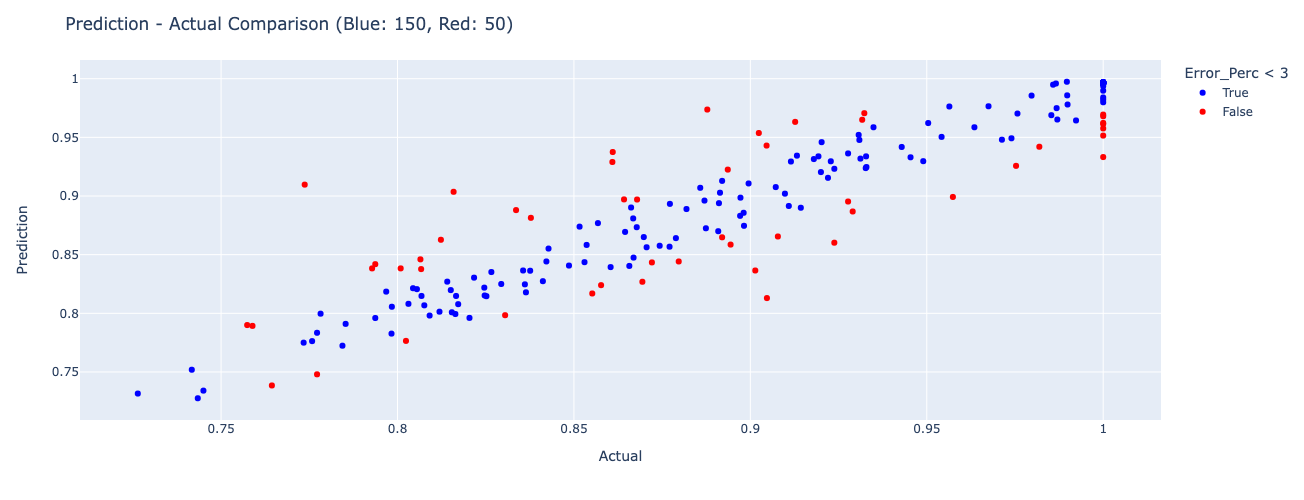

In [162]:
fig = px.scatter(res_ann, x="Actual", y="Prediction", color = "Error_Perc < 3", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Actual", "Prediction", "Error_Perc"])

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Prediction - Actual Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

### S55_IO_VRS 

In [163]:
X = dfs_data[3]
X.head()

,Input 1,Input 2,Input 3,Input 4,Input 5,Output 1,Output 2,Output 3,Output 4,Output 5
DMU 1,140.18,303.70,235.21,22.82,122.08,102.06,314.78,35.80,39.69,663.95
DMU 2,147.97,263.95,125.54,29.06,162.43,100.09,329.17,61.36,37.58,645.58
DMU 3,141.21,264.98,368.21,28.66,214.37,99.11,414.78,70.21,35.22,355.36
DMU 4,95.55,244.37,251.49,30.25,135.42,118.90,303.65,84.49,49.91,401.68
DMU 5,116.52,271.49,214.32,29.31,284.07,150.47,299.46,71.21,38.18,458.28


In [164]:
y = dfs_es[12]
y.head()

,Efficiency
DMU,
DMU 1,0.868732
DMU 2,0.984469
DMU 3,0.795519
DMU 4,0.973079
DMU 5,0.863545


In [165]:
scaler = StandardScaler()
reg_model = LinearRegression()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.0022977269747848942
neg_root_mean_squared_error: -0.047900937944967435
r2: 0.6451671487496935


In [166]:
reg_model = DecisionTreeRegressor(random_state=42)

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.004622161574706123
neg_root_mean_squared_error: -0.06783208692187521
r2: 0.2854100094257744


In [167]:
reg_model = KNeighborsRegressor()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.0026112585643772944
neg_root_mean_squared_error: -0.051090054772929404
r2: 0.5968598885174929


In [168]:
reg_model = RandomForestRegressor(random_state=42)

pipe = make_pipeline(scaler, reg_model)


# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.0018292235971218804
neg_root_mean_squared_error: -0.04274984352085095
r2: 0.7175403615429526


In [169]:
reg_model = GradientBoostingRegressor(random_state=42)

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.0012466234503929097
neg_root_mean_squared_error: -0.035255340916212394
r2: 0.8078411429285456


In [170]:
# Determination of the kernel used and the value lenght_scale at which the optimization process starts
kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3))

# Application of the regressor (alpha makes a statement about a possible noise of the training data)
reg_model = GaussianProcessRegressor(kernel=kernel, alpha=0.1, random_state=42)

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.0027374652254283883
neg_root_mean_squared_error: -0.05230529902096646
r2: 0.5778738874795852


In [171]:
# Choose regression method and set hyperparameter
reg_model=SVR()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.004019398475686544
neg_root_mean_squared_error: -0.06338402229344912
r2: 0.380809600383668


In [172]:
poly = PolynomialFeatures(degree=2)

# Choose regression method and set hyperparameter
reg_model=GradientBoostingRegressor(random_state=42)

pipe = make_pipeline(scaler, poly, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.001390193805114184
neg_root_mean_squared_error: -0.03721418031813768
r2: 0.7861708259820424


In [173]:
poly = PolynomialFeatures(degree=3)

# Choose regression method and set hyperparameter
reg_model=LinearRegression()

pipe = make_pipeline(scaler, poly, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.0009039335840337356
neg_root_mean_squared_error: -0.030004307826523365
r2: 0.8610656358108646


In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)

res = pd.DataFrame()
res["Prediction"] = pd.Series(prediction.ravel())
res["Actual"] = y_test.values
res["Diff"] = res.Prediction - res.Actual
res["Error_Perc"] = ((res.Prediction - res.Actual) / res.Actual) * 100 
res["Error_Perc < 3"] = np.abs(res["Error_Perc"]) < 3  
res = res.round(4)
res

,Prediction,Actual,Diff,Error_Perc,Error_Perc < 3
0,0.8331,0.8151,0.0180,2.2062,True
1,0.9070,0.8987,0.0084,0.9297,True
2,0.9570,0.8676,0.0894,10.3089,False
3,0.8954,0.8790,0.0163,1.8570,True
4,1.0182,0.9557,0.0625,6.5386,False
...,...,...,...,...,...
195,0.7515,0.7913,-0.0398,-5.0258,False
196,0.8090,0.8145,-0.0054,-0.6656,True
197,0.8759,0.8798,-0.0038,-0.4366,True
198,1.0331,1.0000,0.0331,3.3066,False


In [175]:
blue = res["Error_Perc < 3"].sum()
print(blue)
red = len(res["Error_Perc < 3"]) - (res["Error_Perc < 3"].sum())
red

148


52

In [176]:
print(res.describe())

       Prediction      Actual        Diff  Error_Perc
count  200.000000  200.000000  200.000000  200.000000
mean     0.890169    0.889991    0.000180    0.091751
std      0.076870    0.078683    0.029918    3.282488
min      0.726900    0.724500   -0.113500  -11.354100
25%      0.836900    0.827625   -0.013325   -1.536250
50%      0.885200    0.880650    0.002600    0.338900
75%      0.945475    0.963075    0.015225    1.727275
max      1.128600    1.000000    0.128600   13.240400


In [178]:
rho, p = stats.spearmanr(res.Prediction, res.Actual)
print("rho:", rho.round(4)) 
print("p-Value", p.round(4)) 

rho: 0.9449
p-Value 0.0


In [179]:
res.to_excel("Data/S55_ML.xlsx", index=False)

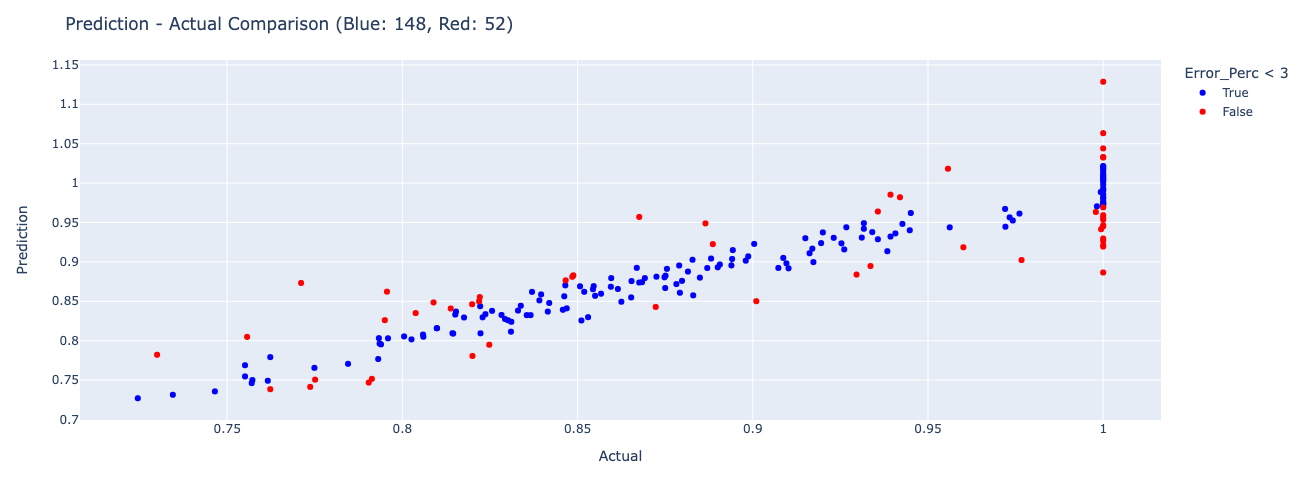

In [180]:
fig = px.scatter(res, x="Actual", y="Prediction", color = "Error_Perc < 3", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Actual", "Prediction", "Error_Perc"])

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Prediction - Actual Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

In [ ]:
np.random.seed(1)
tf.random.set_seed(21)

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))

ann.add(tf.keras.layers.Dense(units=1))
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')
ann.fit(X_train, y_train, batch_size = 32, epochs = 1000, verbose=1)

In [184]:
print("mean_squared_error:", mean_squared_error(y_test, ann.predict(X_test)))
print("neg_mean_squared_error:", mean_squared_error(y_test, ann.predict(X_test), squared=False))
print("r2:", r2_score(y_test, ann.predict(X_test)))

mean_squared_error: 0.0012008843326117569
neg_mean_squared_error: 0.03465377804239758
r2: 0.8050475222335124


In [185]:
prediction = ann.predict(X_test)

res_ann = pd.DataFrame()
res_ann["Prediction"] = pd.Series(prediction.ravel())
res_ann["Actual"] = y_test.values
res_ann["Diff"] = res_ann.Prediction - res_ann.Actual
res_ann["Error_Perc"] = ((res_ann.Prediction - res_ann.Actual) / res_ann.Actual) * 100 
res_ann["Error_Perc < 3"] = np.abs(res_ann["Error_Perc"]) < 3 
res_ann = res_ann.round(4)

res_ann

,Prediction,Actual,Diff,Error_Perc,Error_Perc < 3
0,0.7892,0.8151,-0.0259,-3.1716,False
1,0.9062,0.8987,0.0076,0.8430,True
2,0.8474,0.8676,-0.0202,-2.3243,True
3,0.9022,0.8790,0.0232,2.6351,True
4,0.9893,0.9557,0.0336,3.5147,False
...,...,...,...,...,...
195,0.7548,0.7913,-0.0365,-4.6150,False
196,0.8085,0.8145,-0.0060,-0.7368,True
197,0.9290,0.8798,0.0492,5.5927,False
198,1.0003,1.0000,0.0003,0.0278,True


In [186]:
blue = res_ann["Error_Perc < 3"].sum()
print(blue)
red = len(res_ann["Error_Perc < 3"]) - (res_ann["Error_Perc < 3"].sum())
red

121


79

In [187]:
res_ann.describe()

,Prediction,Actual,Diff,Error_Perc
count,200.000000,200.000000,200.000000,200.000000
mean,0.887376,0.889991,-0.002616,-0.172667
std,0.073989,0.078683,0.034641,3.892293
min,0.735900,0.724500,-0.146600,-14.663400
25%,0.830600,0.827625,-0.023700,-2.607850
50%,0.878200,0.880650,0.000600,0.061000
75%,0.949900,0.963075,0.017400,2.025925
max,1.001000,1.000000,0.095000,13.018800


In [188]:
rho, p = stats.spearmanr(res_ann.Prediction, res_ann.Actual)
print("rho:", rho.round(4)) 
print("p-Value", p.round(4)) 

rho: 0.905
p-Value 0.0


In [191]:
res_ann.to_excel("Data/S55_DL.xlsx", index=False)

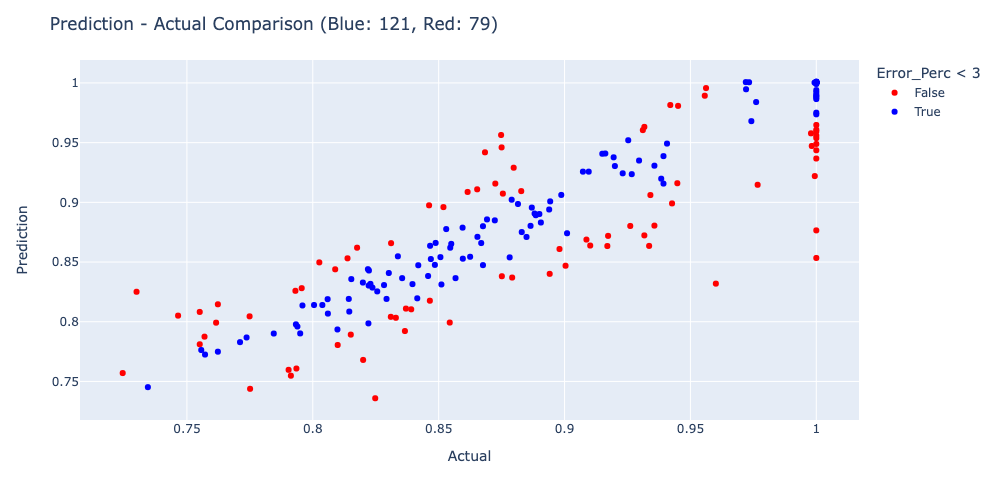

In [192]:
fig = px.scatter(res_ann, x="Actual", y="Prediction", color = "Error_Perc < 3", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Actual", "Prediction", "Error_Perc"])

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Prediction - Actual Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

In [2]:
import numpy as np
[int(x) for x in np.linspace(start = 20, stop = 2000, num = 10)]

[20, 240, 460, 680, 900, 1120, 1340, 1560, 1780, 2000]

In [4]:
np.linspace(start = 20, stop = 2000)

array([  20.        ,   60.40816327,  100.81632653,  141.2244898 ,
        181.63265306,  222.04081633,  262.44897959,  302.85714286,
        343.26530612,  383.67346939,  424.08163265,  464.48979592,
        504.89795918,  545.30612245,  585.71428571,  626.12244898,
        666.53061224,  706.93877551,  747.34693878,  787.75510204,
        828.16326531,  868.57142857,  908.97959184,  949.3877551 ,
        989.79591837, 1030.20408163, 1070.6122449 , 1111.02040816,
       1151.42857143, 1191.83673469, 1232.24489796, 1272.65306122,
       1313.06122449, 1353.46938776, 1393.87755102, 1434.28571429,
       1474.69387755, 1515.10204082, 1555.51020408, 1595.91836735,
       1636.32653061, 1676.73469388, 1717.14285714, 1757.55102041,
       1797.95918367, 1838.36734694, 1878.7755102 , 1919.18367347,
       1959.59183673, 2000.        ])